<a href="https://colab.research.google.com/github/vidhikapoor20/ML-Sem5/blob/master/Labs/%20ML_Lab3_16072020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2)
 
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.shape

(195, 43)

In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [6]:
# simplify and remove unnecssary columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'],inplace = True, axis=1)

In [7]:
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [8]:
#rename columns to sensible names
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-Region'},inplace=True)

In [9]:
df_can.head()

,Country,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [10]:
#count total immigration by country for all years
df_can['total_immigration']=df_can.sum(axis=1)

In [11]:
df_can.head()

,Country,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [12]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,964.379487,1064.148718,1136.856410,1138.712821,993.153846,962.625641,1026.076923,989.153846,824.241026,922.143590,1111.343590,1244.323077,1144.158974,1114.343590,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,3158.730195,2952.093731,3330.083742,3495.220063,3613.336444,3091.492343,3321.045004,3070.761447,2385.943695,2887.632585,3664.042361,3961.621410,3660.579836,3623.509519,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,2.000000,3.000000,6.500000,11.500000,9.500000,10.500000,14.500000,19.500000,15.000000,16.000000,16.000000,22.000000,18.500000,21.500000,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,38.000000,51.000000,74.000000,85.000000,76.000000,91.000000,118.000000,114.000000,106.000000,116.000000,138.000000,169.000000,165.000000,161.000000,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,612.500000,657.500000,655.000000,722.500000,545.000000,550.500000,603.500000,612.500000,535.500000,548.500000,659.000000,793.500000,686.000000,673.500000,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,31668.000000,23380.000000,34123.000000,33720.000000,39231.000000,30145.000000,29322.000000,22965.000000,21049.000000,30069.000000,35529.000000,36434.000000,31961.000000,36439.000000,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [13]:
df_can.dtypes ## all columns are of correct datatype.

Country              object
Continent            object
Continent-Region     object
DevName              object
1980                  int64
1981                  int64
1982                  int64
1983                  int64
1984                  int64
1985                  int64
1986                  int64
1987                  int64
1988                  int64
1989                  int64
1990                  int64
1991                  int64
1992                  int64
1993                  int64
1994                  int64
1995                  int64
1996                  int64
1997                  int64
1998                  int64
1999                  int64
2000                  int64
2001                  int64
2002                  int64
2003                  int64
2004                  int64
2005                  int64
2006                  int64
2007                  int64
2008                  int64
2009                  int64
2010                  int64
2011                

In [14]:
#select immigration of years 1980-1985 from the dataset, for all countries
df_can[['Country',1980,1981,1982,1983,1984,1985]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [15]:
df_can.set_index('Country', inplace=True)

In [16]:
df_can.head()

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [17]:
##optional: to remove the name of the index
df_can.index.name = None

In [18]:
df_can.head()

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [19]:
# 1. the full row data (all columns)
print(df_can.loc['Japan'])


# alternate methods
print(df_can.iloc[87])
print(df_can[df_can.index == 'Japan'].T.squeeze())


# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index 


# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

Continent                         Asia
Continent-Region          Eastern Asia
DevName              Developed regions
1980                               701
1981                               756
1982                               598
1983                               309
1984                               246
1985                               198
1986                               248
1987                               422
1988                               324
1989                               494
1990                               379
1991                               506
1992                               605
1993                               907
1994                               956
1995                               826
1996                               994
1997                               924
1998                               897
1999                              1083
2000                              1010
2001                              1092
2002                     

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.


To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [20]:
df_can.columns = list(map(str, df_can.columns))
[print (type(x)) for x in df_can.columns.values] #uncomment to check type of column headers

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [21]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.


For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).



In [22]:
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print(condition)


# 2. pass this condition into the dataFrame
df_can[condition]
    
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can.where(df_can['Continent']=='Asia') 


Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191.0,1829.0,2162.0,3404.0,7583.0,5907.0,2741.0,1406.0,1411.0,3004.0,3801.0,5870.0,5416.0,6547.0,5105.0,3723.0,2462.0,1752.0,1631.0,1419.0,1803.0,2117.0,2291.0,1713.0,1816.0,1852.0,3153.0,2574.0,1784.0,2171.0,1942.0,1723.0,1731.0,2112.0,97146.0
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,Asia,Western Asia,Developing regions,1.0,2.0,1.0,6.0,0.0,18.0,7.0,12.0,7.0,18.0,4.0,18.0,41.0,41.0,39.0,73.0,144.0,121.0,141.0,134.0,122.0,181.0,171.0,113.0,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0,2985.0
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#multiple conditions 
df_can[(df_can['Continent']=='Asia')&(df_can['2013']>10000)]


,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


In [24]:
df_can[(df_can['Continent']=='Asia')]

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,257,400,470,379,430,446,536,729,712,674,897,657,623,591,728,774,9327


In [25]:
import matplotlib.pyplot as plt

In [26]:
df_can.columns

Index(['Continent', 'Continent-Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'total_immigration'],
      dtype='object')

In [27]:
years = list(map(str,range(1980,2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [28]:
india = df_can.loc['India',years]

In [29]:
india

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

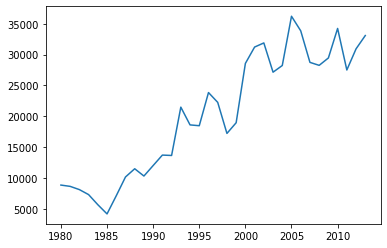

In [30]:
india.plot()

In [31]:
india.index

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

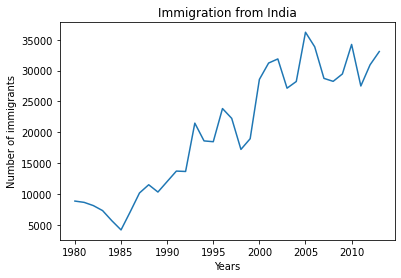

In [32]:
india.index = india.index.map(int)

india.plot(kind='line')
plt.title('Immigration from India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

#update the plot
plt.show()

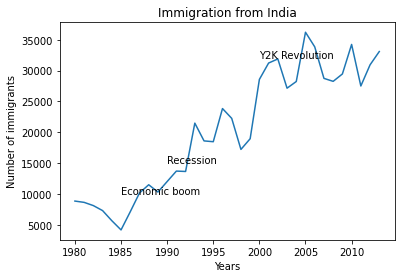

In [33]:
india.plot(kind='line')
plt.title('Immigration from India')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.text(2000, 32000, 'Y2K Revolution')
plt.text(1990,15000,'Recession')
plt.text(1985,10000,'Economic boom')
#update the plot
plt.show()

In [34]:
years = list(map(str,range(1980,2014)))


china = df_can.loc['China', years]

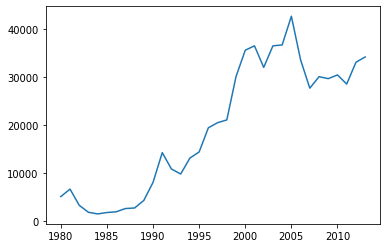

In [35]:
china.plot()

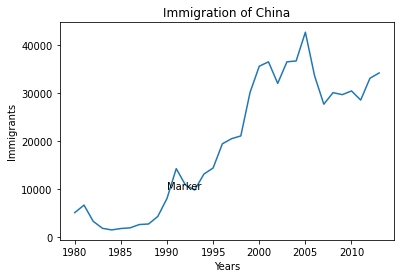

In [36]:
china.index = china.index.map(int)

china.plot(kind='line')

plt.title('Immigration of China')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.text(1990,10000,'Marker')
plt.show()

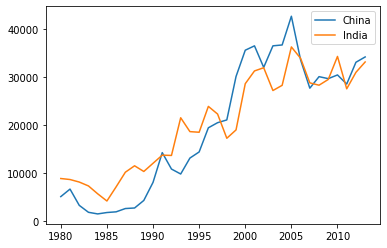

In [37]:

years = list(map(str,range(1980,2014)))


chinaindia = df_can.loc[['China','India'], years]

new_chinaindia = chinaindia.transpose()
new_chinaindia.plot()

In [38]:
chinaindia

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [39]:
new_chinaindia

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


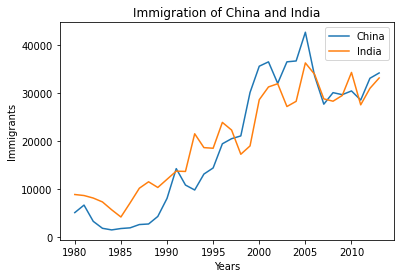

In [40]:
new_chinaindia.index = new_chinaindia.index.map(int)

new_chinaindia.plot(kind='line')

plt.title('Immigration of China and India')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.show()

To see graphs of all countries.. like 2 countries at once.. it will form 194 graphs... but this is the code.
years = list(map(str,range(1980,2014)))

name = list(df_can.index)
redundant = []
for i in name:
  redundant.append(i)
  for j in name:
    if j in redundant:
      continue
    else:
      temp = df_can.loc[[i,j], years]
      new_temp = temp.transpose()
      new_temp.plot()

In [41]:
#top 5 countries that send immigrants to canada
df_can.sort_values(by='total_immigration', ascending=False, axis='index', inplace=True)

top5 = df_can.head(5)

top5

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total_immigration
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


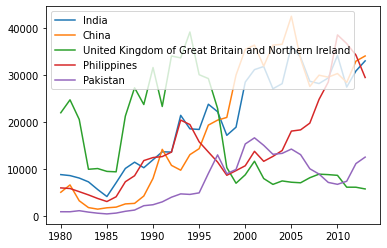

In [42]:
years = list(map(str,range(1980,2014)))


top5_clean = top5[years]

top5_clean = top5_clean.transpose()
top5_clean.plot()

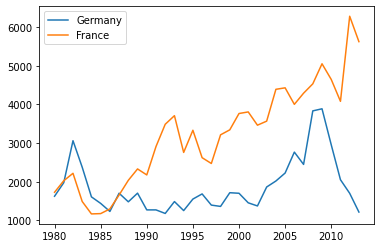

In [43]:
years = list(map(str,range(1980,2014)))


germanyfrance = df_can.loc[['Germany','France'], years]

new_germanyfrance = germanyfrance.transpose()
new_germanyfrance.plot()

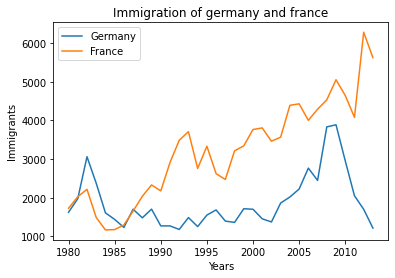

In [44]:
new_germanyfrance.index = new_germanyfrance.index.map(int)

new_germanyfrance.plot(kind='line')

plt.title('Immigration of germany and france')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.show()

PART 2

In [45]:
top5_clean

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


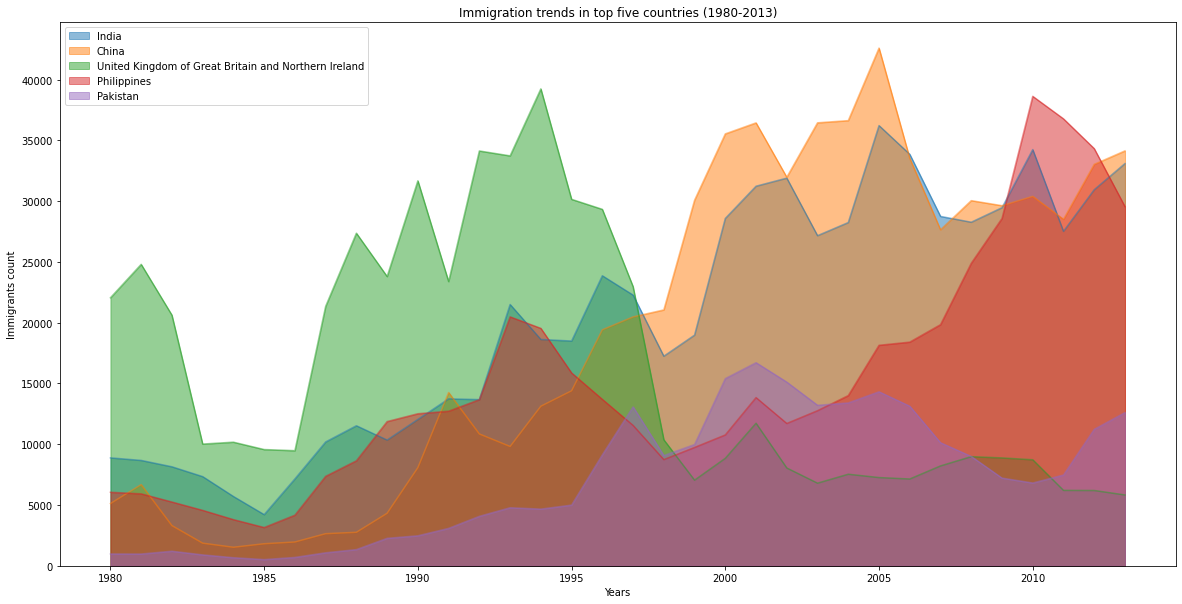

In [46]:
top5_clean.index = top5_clean.index.map(int)

top5_clean.plot(kind="area", stacked=False, figsize=(20,10))

plt.title('Immigration trends in top five countries (1980-2013)')
plt.xlabel('Years')
plt.ylabel('Immigrants count')

plt.show()

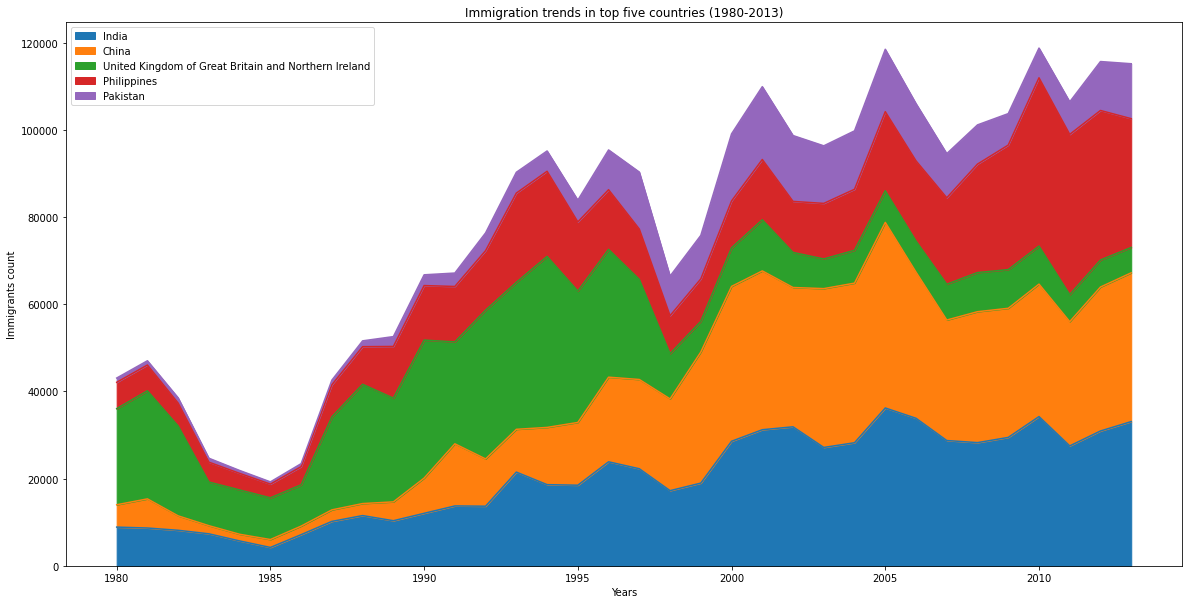

In [47]:
top5_clean.index = top5_clean.index.map(int)

top5_clean.plot(kind="area", stacked=True, figsize=(20,10))

plt.title('Immigration trends in top five countries (1980-2013)')
plt.xlabel('Years')
plt.ylabel('Immigrants count')

plt.show()

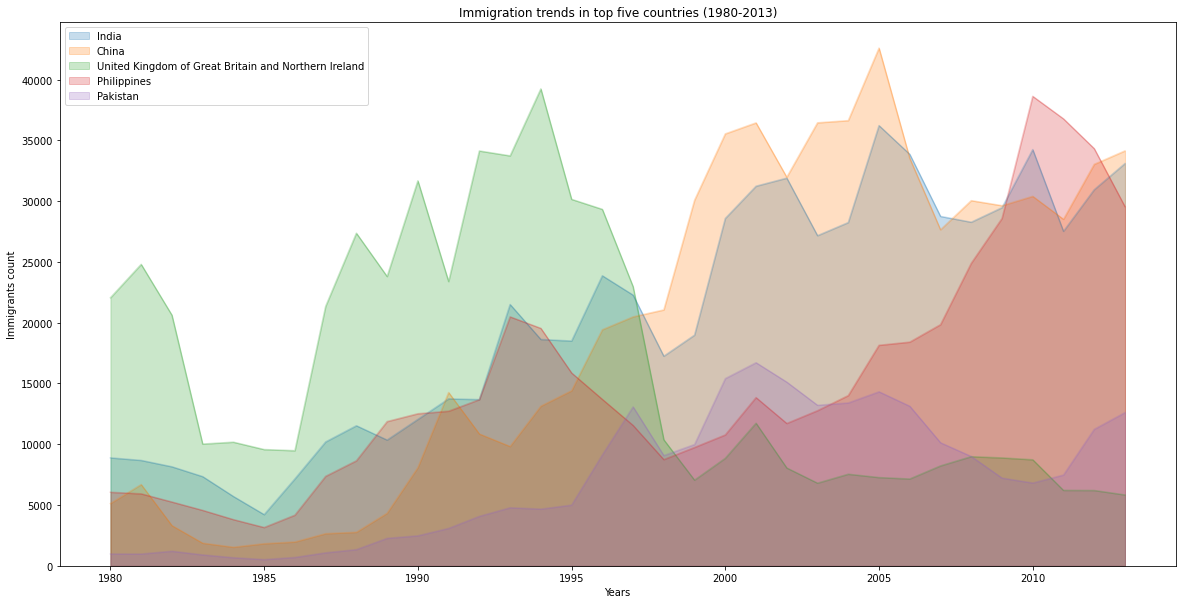

In [48]:
top5_clean.index = top5_clean.index.map(int)

#alpha parameter for transparency - default = 0.5 (range is 0 to 1)

top5_clean.plot(kind="area", stacked=False, figsize=(20,10), alpha=0.25)

plt.title('Immigration trends in top five countries (1980-2013)')
plt.xlabel('Years')
plt.ylabel('Immigrants count')

plt.show()

In [49]:
df_can['2000']

India                                                   28572
China                                                   35529
United Kingdom of Great Britain and Northern Ireland     8840
Philippines                                             10763
Pakistan                                                15400
                                                        ...  
San Marino                                                  0
New Caledonia                                               0
Marshall Islands                                            0
Western Sahara                                              0
Palau                                                       0
Name: 2000, Length: 195, dtype: int64

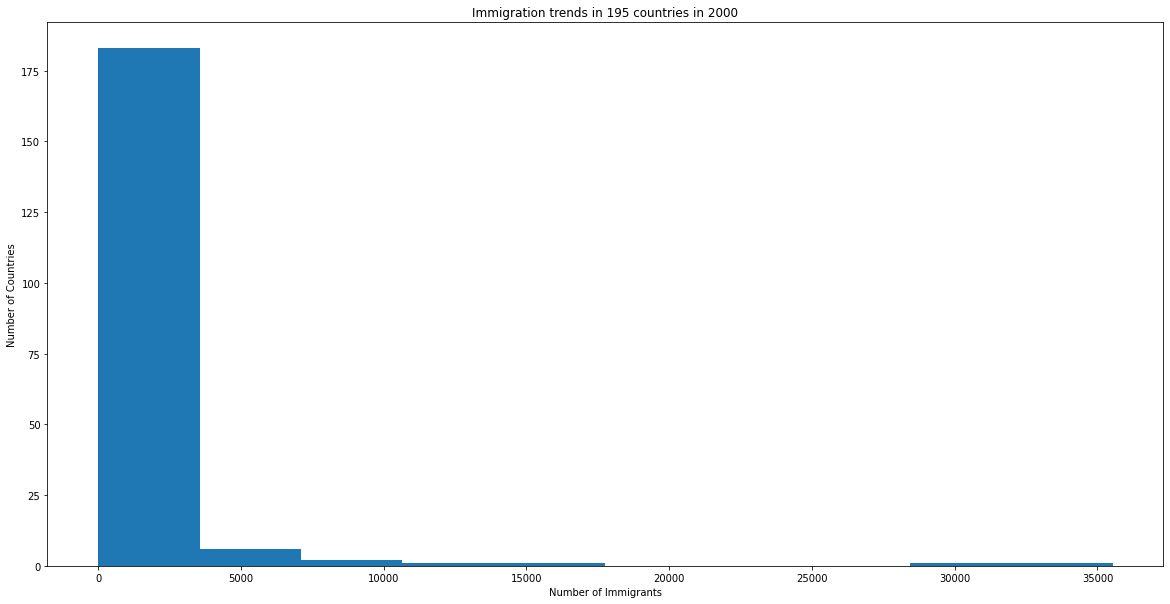

In [50]:
df_can['2000'].plot(kind='hist', figsize=(20,10))

plt.title('Immigration trends in 195 countries in 2000')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

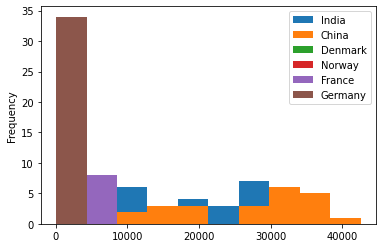

In [51]:
#histogram
years = list(map(str,range(1980,2014)))

df_can.loc[['India','China','Denmark','Norway','France','Germany'], years].T.plot.hist()

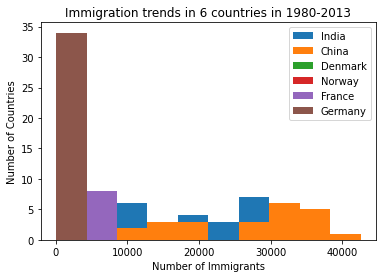

In [52]:
df_can.loc[['India','China','Denmark','Norway','France','Germany'], years].transpose().plot.hist()

plt.title('Immigration trends in 6 countries in 1980-2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

VERTICAL BAR PLOT

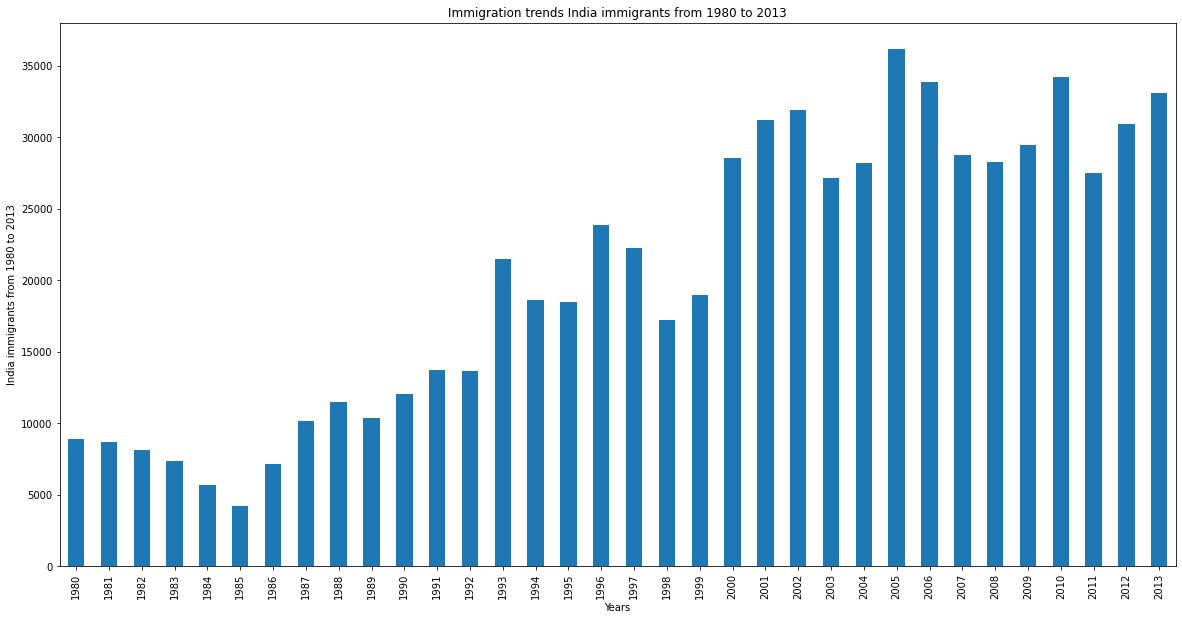

In [53]:
india = df_can.loc['India', years]

india.plot(kind='bar', figsize=(20,10))

plt.title('Immigration trends India immigrants from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('India immigrants from 1980 to 2013')

plt.show()

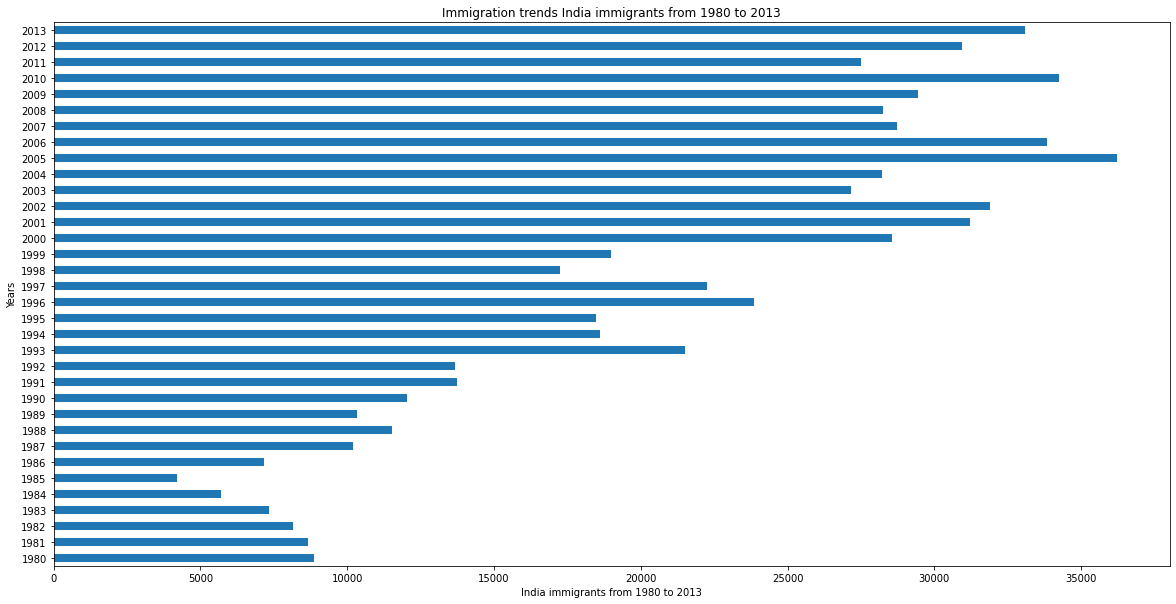

In [54]:
#horizontal plot
india = df_can.loc['India', years]

india.plot(kind='barh', figsize=(20,10))

plt.title('Immigration trends India immigrants from 1980 to 2013')
plt.xlabel('India immigrants from 1980 to 2013')
plt.ylabel('Years')
plt.show()

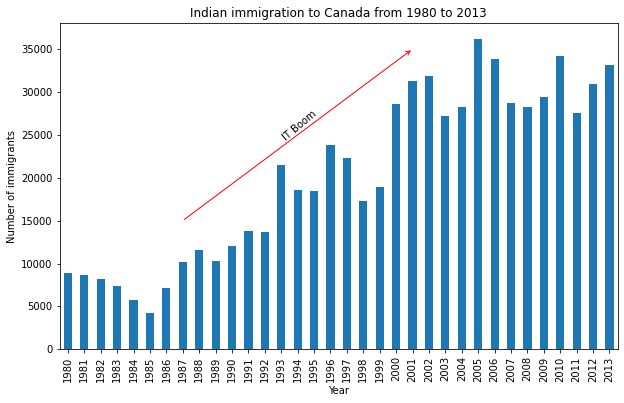

In [55]:
df_india = df_can.loc['India',years]
df_india.plot(kind='bar', figsize=(10,6))
plt.title("Indian immigration to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.annotate('',  #arrow title
             xy=(21,35000), #x,y of arrow head
             xytext=(7,15000), #x, y of arrow tail
             xycoords='data',  #keep unchanged
             arrowprops=dict(arrowstyle='->',color='red') #arrow style with color
             )

plt.annotate('IT Boom', #add text to arrow
             xy=(13,28000),  #x, y of text position
             rotation=40, # counter clockwise rotate text by angle
             xycoords='data', #keep unchanged
             va='top', #position text 
             ha='left') #position text
plt.show()

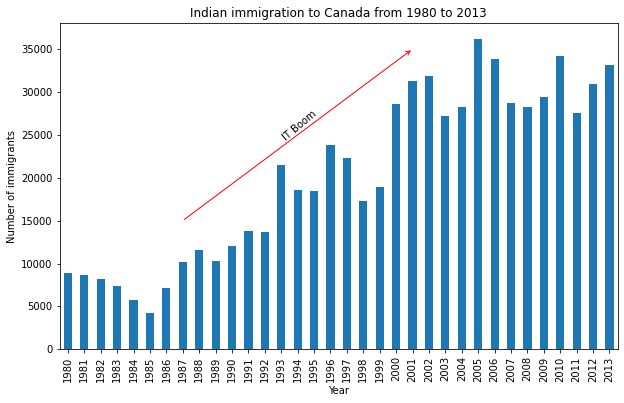

In [56]:
df_india = df_can.loc['India',years]
df_india.plot(kind='bar', figsize=(10,6))
plt.title("Indian immigration to Canada from 1980 to 2013")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.annotate('',  #arrow title
             xy=(21,35000), #x,y of arrow head
             xytext=(7,15000), #x, y of arrow tail
             xycoords='data',  #keep unchanged
             arrowprops=dict(arrowstyle='->',color='red') #arrow style with color
             )

plt.annotate('IT Boom', #add text to arrow
             xy=(13,28000),  #x, y of text position
             rotation=40, # counter clockwise rotate text by angle
             xycoords='data', #keep unchanged
             va='top', #position text 
             ha='left') #position text
plt.show()